# Análise de Acidentes ao Longo de Rodovias 2010 - 2019

#### Aluno:      Joseilton Ferreira<br><br> Matrícula: 20180174611

## Introdução

<p style='text-align: justify'>O projeto final da disciplina <i>Introdução à Ciência de Dados</i> tem como principal objetivo realizar análise em datasets e encontrar resposta para possíveis questionamentos. A primeira opção de dados a se ter interesse em estudar foram os <i>Dados Abertos</i> do <i>Governo Federal</i> para tentar entender como os mesmos se encontram estruturados. Desta forma foi selecionado como alvo de análise o dataset que contém informações referentes aos acidentes ocorridos ao longo de rodovias.</p>

<p style='text-align: justify'>Onde a principal motivação para essa escolha, se dá pelo fato do mesmo ser um dataset com dados extremamentes relevantes e usuais, além de como já mencionado, se tratar de um dataset não pré-processado e com isso tentar entender como essa base de dados se encontra elaborada e as dificuldades que por ventura venham a ocorrer na análise da mesma, de modo a no final desta análise entender os resultados obtidos e apontar as arestas presentes.</p>

## Dataset Utilizado

<p style='text-align: justify'>O dataset utilizado foi o que contém as informações dos acidentes ocorridos ao longo de rodovias no período de 2010 a 2019, podendo o mesmo ser obtido nos dados abertos da <i>ANTT - Agência Nacional de Transportes Terrestres</i>, o qual está disponível em <a>https://dados.antt.gov/dataset/acidentes-rodovias</a>.</p>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
pd.plotting.register_matplotlib_converters()

In [3]:
file = 'dataset/demostrativo_acidentes.csv'
df_acidentes = pd.read_csv(file, sep=';', encoding='cp1252',dtype={'No_DaOcorrencia':'object',
                                                                   'Automovel':'object','Caminhao':'object','Moto':'object',
                                                                   'Transp__Cargas_Especiais':'object',
                                                                   'Utilitario':'object', 'Ilesos':'object'})

<p style='text-align: justify'>Como pode ser observado o dataset traz presente informações pertinentes referentes a data da ocorrência, trecho de rodovia, tipo de acidente, quantidade e tipo de veículos envolvidos e situação das vítimas envolvidas nas ocorrências.</p>

In [4]:
df_acidentes.head()

Concessionaria      Data Horario No_DaOcorrencia TipoDeOcorrencia   Km  \
0             AF  01/01/10    0:38               3       sem vítima  314   
1             AF  01/01/10   23:31             170       sem vítima  297   
2             AF  01/01/10    6:39              14       sem vítima  230   
3             AF  01/01/10    7:14              21       sem vítima  301   
4             AF  01/01/10    8:56              41       com vítima  174   

      Trecho Sentido    TipoDeAcidente Automovel  ...  Outros Tracao_animal  \
0  BR-101/RJ     Sul    Saida de Pista         1  ...     NaN           NaN   
1  BR-101/RJ     Sul  Colisão Traseira       NaN  ...     1.0           NaN   
2  BR-101/RJ   Norte    Saida de Pista         1  ...     NaN           NaN   
3  BR-101/RJ   Norte    Saida de Pista         1  ...     NaN           NaN   
4  BR-101/RJ   Norte   Colisão Lateral       NaN  ...     1.0           NaN   

  Transp__Cargas_Especiais  Trator__maquinas  Utilitario  Ilesos  \
0                      NaN               NaN         NaN       1   
1                      NaN               NaN         NaN       2   
2                      NaN               NaN         NaN       2   
3                      NaN               NaN         NaN       2   
4                      NaN               NaN         NaN       1   

  Levemente_feridos  Moderadamente_feridos Gravemente_feridos Mortos  
0               NaN                    NaN                NaN    NaN  
1               NaN                    NaN                NaN    NaN  
2               NaN                    NaN                NaN    NaN  
3               NaN                    NaN                NaN    NaN  
4               1.0                    1.0                NaN    NaN  

[5 rows x 24 columns]

In [5]:
df_acidentes.tail()

Concessionaria      Data   Horario No_DaOcorrencia TipoDeOcorrencia  \
648638         VIASUL  31/12/19  18:11:11             255       Sem vítima   
648639         VIASUL  31/12/19  18:35:23             263       Sem vítima   
648640         VIASUL  31/12/19  19:26:23             275       com vítima   
648641         VIASUL  31/12/19  22:04:06             308       Sem vítima   
648642         VIASUL  31/12/19  23:13:29             317       com vítima   

         Km     Trecho Sentido       TipoDeAcidente Automovel  ...  Outros  \
648638  362  BR-386/RS     Sul          Capotamento         1  ...     0.0   
648639   91  BR-290/RS   Leste  Queda de ribanceira         1  ...     0.0   
648640   71  BR-290/RS   Leste   Colisão - Traseira         2  ...     0.0   
648641   20  BR-290/RS   Leste   Colisão - Traseira         3  ...     0.0   
648642   72  BR-290/RS   Ambos          Capotamento         1  ...     0.0   

       Tracao_animal Transp__Cargas_Especiais  Trator__maquinas  Utilitario  \
648638           0.0                        0               0.0           0   
648639           0.0                        0               0.0           0   
648640           0.0                        0               0.0           0   
648641           0.0                        0               0.0           0   
648642           0.0                        0               0.0           0   

        Ilesos Levemente_feridos  Moderadamente_feridos Gravemente_feridos  \
648638       2               0.0                    0.0                0.0   
648639       2               0.0                    0.0                0.0   
648640       0               1.0                    1.0                3.0   
648641       8               0.0                    0.0                0.0   
648642       0               0.0                    1.0                0.0   

       Mortos  
648638    0.0  
648639    0.0  
648640    1.0  
648641    0.0  
648642    0.0  

[5 rows x 24 columns]

## Pré-processamento dos Dados

<p style='text-align: justify'>Algumas colunas do dataset utilizado apresentam dados misturados, onde podem ser encontrados informações do tipo <i>int</i>, <i>str</i>, <i>NaN</i> e <i>float</i>, isso ocorre devido à falhas na criação do arquivo de dataset, pois no dicionário de dados o qual se foi obtido o dataset mostra que essas colunas devem possuir dados com valores numéricos, as colunas que possuem essa inconsistência de tipo podem ser observados no array abaixo:</p>

In [6]:
type_error = ['No_DaOcorrencia', 'Automovel', 'Caminhao', 'Moto', 'Transp__Cargas_Especiais', 'Utilitario', 'Ilesos']

<p style='text-align: justify'>Desta forma torna-se necessário realizar a padronização dessas informações, sendo utilizado para tal, o método presente no <i>Pandas</i>, <b>.to_numeric()</b>, além de substituir possíveis entradas inconsistentes por uma valor <i>NaN</i>.</p>

In [7]:
for i in type_error:
    df_acidentes[i] = pd.to_numeric(df_acidentes[i], errors='coerce')

<p style='text-align: justify'>Por consequência para tratar os dados do dataset que possuem entradas do tipo <i>NaN</i>, será utilizado o método do <i>Pandas</i>, <b>.fillna(0)</b>, fazendo com que os que estam na forma de <i>NaN</i> sejam atribuídos o valor <i>0</i>, onde está alteração não prejudica a interpretação do dataset, pois se não há uma informação de um automóvel envolvido em acidente, por consequência o número de automóveis envolvidos presumisse que seja zero.</p>

<p style='text-align: justify'>Também será utilizado o método <b>.astype('uint16')</b> para converter os valores para do tipo <i>float</i> para <i>unsigned int</i>, já que não faz sentido números negativos e/ou fracionados para esses dados, e caso exista algum número desse tipo no dataset, provavelmente foi erro de inserção de dados.</p>

In [8]:
for i in df_acidentes.columns[9:]:
    df_acidentes[i] = df_acidentes[i].fillna(0).astype('uint16')

<p style='text-align: justify'>Como pode ser observado abaixo, há campos como <b>"Colisão Traseira"</b> que representam o mesmo tipo de acidente porém por algum motivo apresentam como grafia diferente, sendo em algumas entradas apresentado como <b>"Colisão traseira"</b>, onde pode ser observado que a coluna <i>'TipoDeAcidente'</i> apresenta 313 entradas unidos, muitas dessas repetidas ou ambíguas, fazendo com gerem resultados errôneos.</p>

In [9]:
df_acidentes['TipoDeAcidente'].unique();

In [10]:
len(df_acidentes['TipoDeAcidente'].unique())

313

<p style='text-align: justify'>Dessa forma faz-se necessário procurar esses erros e tentar minimiza-los, para tanto será utilizado o array <b>replace_array</b> que contém as entradas a serem substituídas pelas contidas no array <b>value_array</b>.</p>

In [11]:
replace_array = [' - ', '^ab.*osto\.*$', '^ab.*tido\.*$', '^ab.*l\.*$', '^não.*def\.*$', 'c/', 's/', ' / ',
                 '^atropel.* de', '  ', ' $', '"', '^outros.*ncias$', 'estac\.', 'veiculo', 'choque-', 'pist$',
                 'colisão.*frontal\)', 'colisão.*traseira\)', '^atro.*usuário$', '^atro.*funcionário$',
                 '^atro.*andarilho$', '^colisão.*áculo$', '^colisão ojeto fixo$', '^ incidente ']
value_array = [' ', 'abalroamento sentido oposto', 'abalroamento mesmo sentido', 'abalroamento transversal', 'não definido',
               'com', 'sem', ' ', 'atropelamento', ' ', '', '', 'outros sequências', 'estacionado', 'veículo', 'choque',
               'pista', 'colisão frontal', 'colisão traseira', 'atropelamento usuário', 'atropelamento fucionário',
               'atropelamento andarilho', 'colisão com obstáculos', 'colisão objeto fixo', '']

In [12]:
df_acidentes['TipoDeAcidente'] = df_acidentes['TipoDeAcidente'].str.lower()
for i in range(len(replace_array)):
    df_acidentes['TipoDeAcidente'] = df_acidentes['TipoDeAcidente'].replace(regex=replace_array[i], value=value_array[i])

<p style='text-align: justify'>Como pode ser observado houve uma redução de 313 entradas únicas para 156, pode ser observado ainda que em algumas como por exemplo <b>"atropelamento morador/trabalhador/estudante"</b> e <b>"atropelamento morador"</b> apresentam em suma a mesma informação, porém foi decidido não agrupar esse tipo de situação pelo fato de que pode ter alguma relevância para a rodovia em si separar esses dados, e outro em outros casos pode ser irrelevante separar essas informações. Uma dessas entradas é um <i>NaN</i>.</p>

In [13]:
len(df_acidentes['TipoDeAcidente'].unique())

156

In [14]:
df_acidentes['TipoDeAcidente'].unique();

## Questionamentos Relacionados ao Dataset

<p style='text-align: justify'>A princípio foi estabelecida inicialmente três perguntas a serem respondidas pela análise do dataset, sendo estas:</p>
<ul>
    <li>Qual o acidente envolvendo veículos mais comum;</li>
    <li>Quais os 5 trechos de rodovia mais perigosos;</li>
    <li>Se há alguma relação de um tipo específico de acidente com rodovia, nesse caso as 5 mais perigosas.</li>
</ul>

<p style='text-align: justify'>Após as análises inicias surgiu novos questionamentos, sendo estes:</p>
<ul>
    <li>Se ocorre um aumento dos acidentes em função do passar dos anos;</li>
    <li>E como se comporta os dados referentes as vítimas para o período de abrangência do dataset.</li>
</ul>

### Qual o Acidente Envolvendo Veículos Mais Comum

<p style='text-align: justify'>Após o pré-processamento os tipos de acidentes presentes no dataset resultaram em 155 valores únicos válidos. Para analisar esses dados será realizada a contagem desses entradas e armazenadas em arrays de forma ordenada. Devido ao tamanho extenso desses arrays de dados será divido em gráficos de barras contendo 31 variáveis, de forma a facilitar a visualização dos dados.</p>

In [15]:
acidentes_array = df_acidentes['TipoDeAcidente'].value_counts().index
valores_array = [j for j in df_acidentes['TipoDeAcidente'].value_counts()]

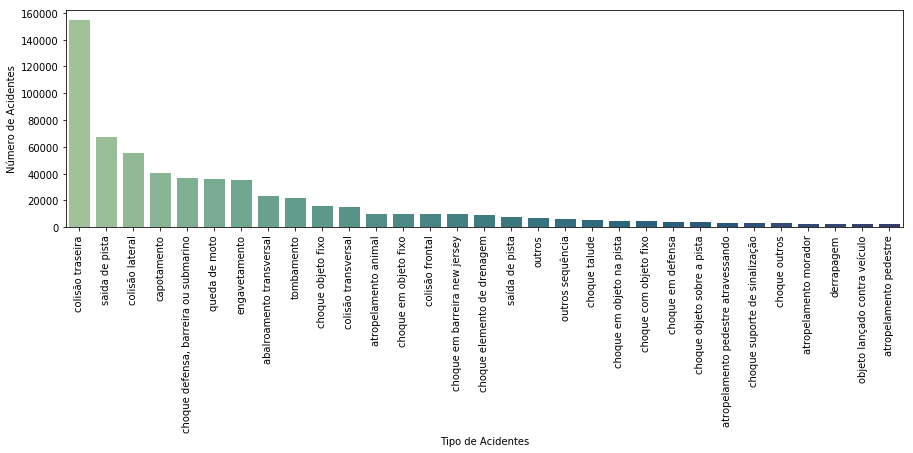

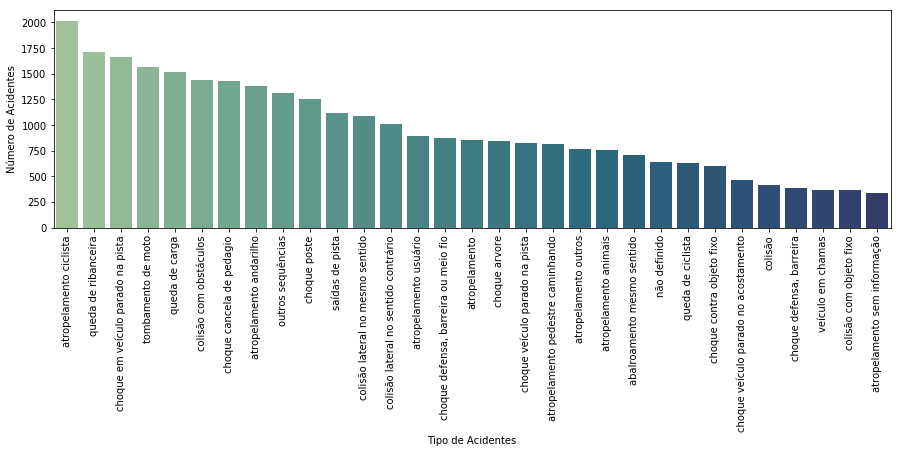

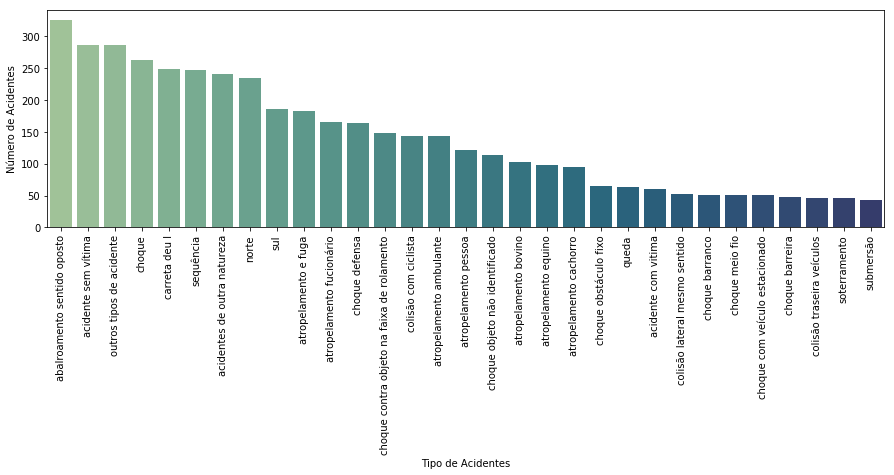

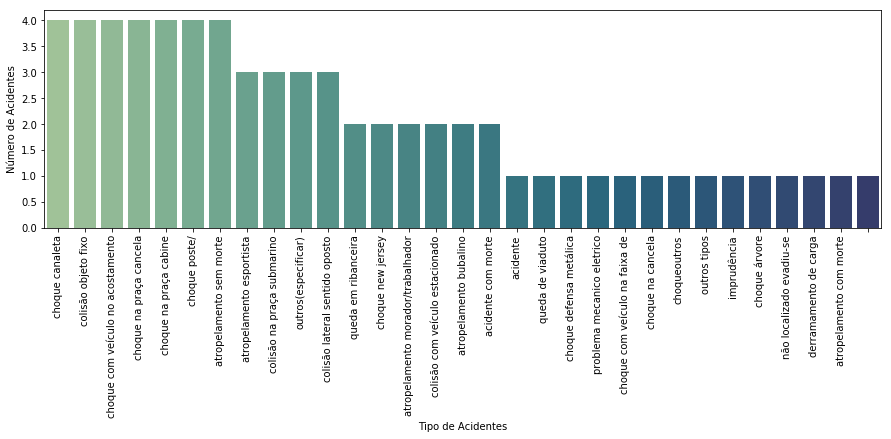

In [16]:
for i in range(0, 155, 31):
    j = i + 31
    fg, ax = plt.subplots(figsize=(15,4))
    sns.barplot(y=valores_array[i:j], x=acidentes_array[i:j], ax=ax,
                palette='crest').set(xlabel="Tipo de Acidentes", ylabel="Número de Acidentes")
    plt.xticks(rotation=90)
plt.show()

<p style='text-align: justify'>Como pode-se observar nos gráficos acima o tipo de acidente que mais ocorreu no período de de 2010 - 2019 foi a <i>Colisão Traseira</i>, sendo este tipo de acidente praticamente o dobro do segundo tipo mais comum que é <i>Saída de Pista</i>.</p>

### Quais os 5 Trechos de Rodovia Mais Perigosos

<p style='text-align: justify'>Para analisar quais os trechos de rodovias que podem ser considerados os mais perigosos, será utilizado o gráfico de barras para ajudar na visualização desses dados, portanto:</p>

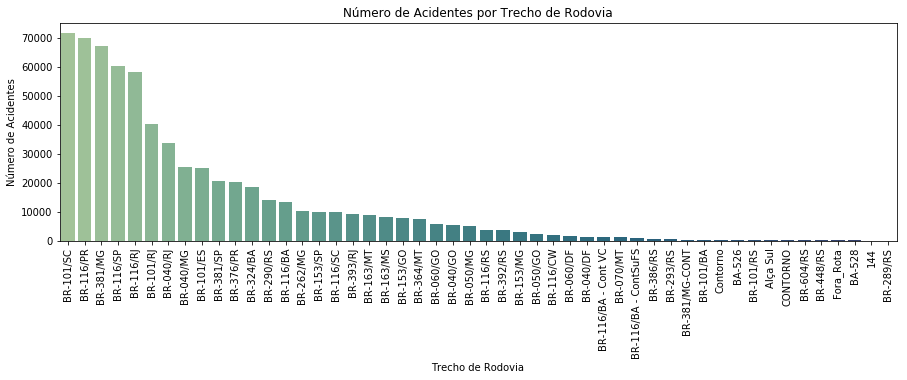

In [17]:
dados_trecho = {"trecho": df_acidentes["Trecho"].value_counts().index,
                "acidentes": [i for i in df_acidentes["Trecho"].value_counts()]}
fg, ax = plt.subplots(figsize=(15,4))
sns.barplot(data=dados_trecho,x="trecho", y="acidentes", ax=ax,
            palette='crest').set(xlabel="Trecho de Rodovia", ylabel="Número de Acidentes",
                                 title="Número de Acidentes por Trecho de Rodovia")
plt.xticks(rotation=90)
plt.show()

<p style='text-align: justify'>Com isso pode-se observar que os cinco trechos que ocorrem uma maior incidência de acidentes são, <i>BR-101/SC</i>, <i>BR-116/PR</i>, <i>BR-381/MG</i>, <i>BR-116/SP</i>, <i>BR-116/RJ</i>, dessa forma a Rodovia mais perigosa pode ser considerada <i>BR-116</i>.</p>

<p style='text-align: justify'></p>

In [18]:
sc_101 = [df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-101/SC'), i].sum() for i in df_acidentes.columns[20:]]
pr_116 = [df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-116/PR'), i].sum() for i in df_acidentes.columns[20:]]
mg_381 = [df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-381/MG'), i].sum() for i in df_acidentes.columns[20:]]
sp_116 = [df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-116/SP'), i].sum() for i in df_acidentes.columns[20:]]
rj_116 = [df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-116/RJ'), i].sum() for i in df_acidentes.columns[20:]]

In [19]:
width = .15
r_01 = np.arange(len(sc_101))
r_02 = [i + width for i in r_01]
r_03 = [i + width for i in r_02]
r_04 = [i + width for i in r_03]
r_05 = [i + width for i in r_04]

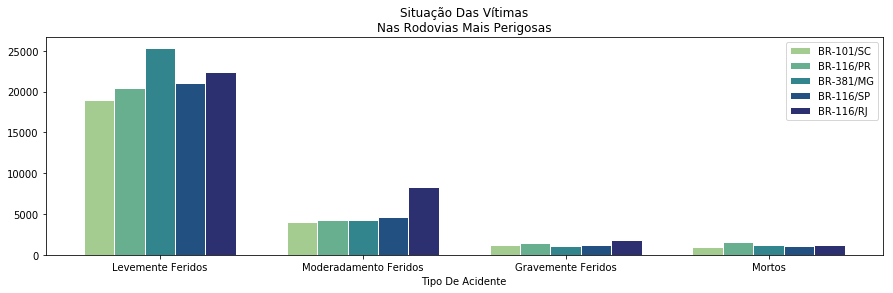

In [20]:
fg, ax = plt.subplots(figsize=(15,4))
plt.bar(r_01, sc_101, color='#a4cc90', width=width, edgecolor='white', label='BR-101/SC')
plt.bar(r_02, pr_116, color='#68af90', width=width, edgecolor='white', label='BR-116/PR')
plt.bar(r_03, mg_381, color='#33858d', width=width, edgecolor='white', label='BR-381/MG')
plt.bar(r_04, sp_116, color='#225081', width=width, edgecolor='white', label='BR-116/SP')
plt.bar(r_05, rj_116, color='#2c3071', width=width, edgecolor='white', label='BR-116/RJ')
plt.xlabel('Tipo De Acidente')
plt.xticks([i + (2 * width) for i in range(len(sc_101))],
           ['Levemente Feridos', 'Moderadamento Feridos', 'Gravemente Feridos', 'Mortos'])
plt.title('Situação Das Vítimas\nNas Rodovias Mais Perigosas')
plt.legend()
plt.show()

<p style='text-align: justify'>Como pode ser visto apesar do trecho <i>BR-101/SC</i> possuir o maior registro de número de acidentes, têm-se que o mesmo dentre os 5 trechos é o que possui os menores índices de vítimas.</p>

### Relação de um Tipo Específico de Acidente com Rodovia

<p style='text-align: justify'>Será analisado para os trechos de rodovias considerados mais perigosos se há alguma relação de um tipo especifico de acidente que se sobressai nessas rodovias em relação a outros, e que venha a destoar do tipo de acidente mais comum que é <i>Colisão Traseira</i>.</p>

#### BR-101/SC

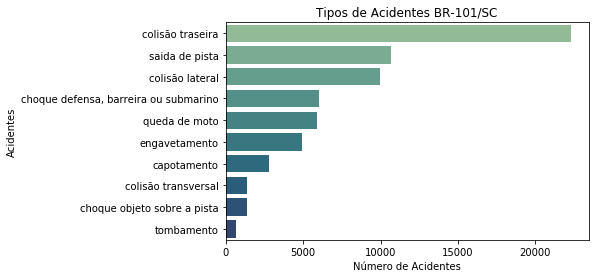

In [21]:
acidentes_br_101_sc = {"br_101_sc": df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-101/SC'), 
                                                      "TipoDeAcidente"].value_counts().sort_values(ascending=False).head(10),
                       "tipo_acidente": [i for i in df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-101/SC'), 
                                        "TipoDeAcidente"].value_counts().sort_values(ascending=False).head(10).index]}
fg, ax = plt.subplots(figsize=(6.5,4))
sns.barplot(data=acidentes_br_101_sc, x="br_101_sc", y="tipo_acidente", ax=ax,
            palette='crest').set(ylabel="Acidentes", xlabel="Número de Acidentes",title="Tipos de Acidentes BR-101/SC")
#plt.xticks(rotation=90)
plt.show()

#### BR-116/PR

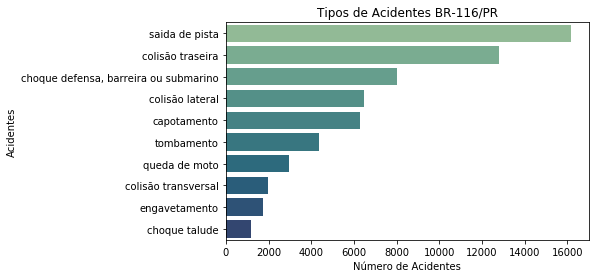

In [22]:
acidentes_br_116_pr = {"br_116_pr": df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-116/PR'), 
                                                      "TipoDeAcidente"].value_counts().sort_values(ascending=False).head(10),
                       "tipo_acidente": [i for i in df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-116/PR'), 
                                        "TipoDeAcidente"].value_counts().sort_values(ascending=False).head(10).index]}
fg, ax = plt.subplots(figsize=(6.5,4))
sns.barplot(data=acidentes_br_116_pr, x="br_116_pr", y="tipo_acidente", ax=ax,
            palette='crest').set(ylabel="Acidentes", xlabel="Número de Acidentes", title="Tipos de Acidentes BR-116/PR")
plt.show()

#### BR-381/MG

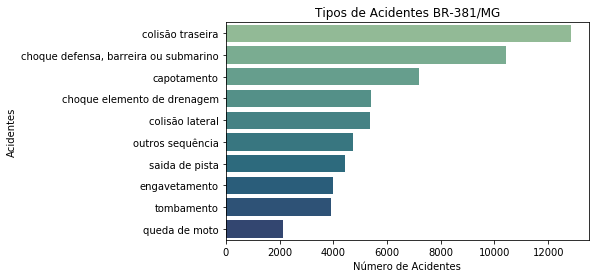

In [23]:
acidentes_br_381_mg = {"br_381_mg": df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-381/MG'), 
                                                      "TipoDeAcidente"].value_counts().sort_values(ascending=False).head(10),
                       "tipo_acidente": [i for i in df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-381/MG'), 
                                        "TipoDeAcidente"].value_counts().sort_values(ascending=False).head(10).index]}
fg, ax = plt.subplots(figsize=(6.5,4))
sns.barplot(data=acidentes_br_381_mg, x="br_381_mg", y="tipo_acidente", ax=ax,
            palette='crest').set(ylabel="Acidentes", xlabel="Número de Acidentes", title="Tipos de Acidentes BR-381/MG")
plt.show()

#### BR-116/SP

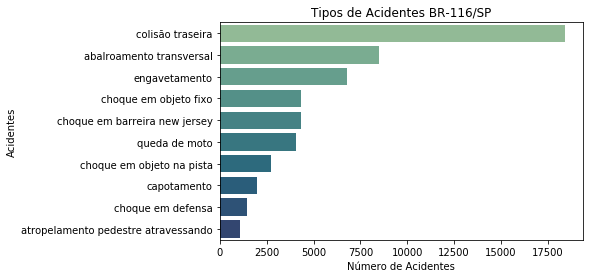

In [24]:
acidentes_br_116_sp = {"br_116_sp": df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-116/SP'), 
                                                      "TipoDeAcidente"].value_counts().sort_values(ascending=False).head(10),
                       "tipo_acidente": [i for i in df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-116/SP'), 
                                        "TipoDeAcidente"].value_counts().sort_values(ascending=False).head(10).index]}
fg, ax = plt.subplots(figsize=(6.5,4))
sns.barplot(data=acidentes_br_116_sp,x="br_116_sp", y="tipo_acidente", ax=ax,
            palette='crest').set(ylabel="Acidentes", xlabel="Número de Acidentes", title="Tipos de Acidentes BR-116/SP")
plt.show()

#### BR-116/RJ

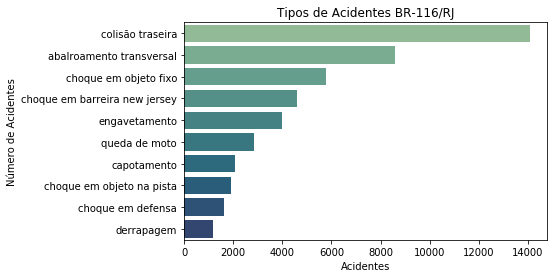

In [25]:
acidentes_br_116_rj = {"br_116_rj": df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-116/RJ'), 
                                                      "TipoDeAcidente"].value_counts().sort_values(ascending=False).head(10),
                       "tipo_acidente": [i for i in df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-116/RJ'), 
                                        "TipoDeAcidente"].value_counts().sort_values(ascending=False).head(10).index]}
fg, ax = plt.subplots(figsize=(6.5,4))
sns.barplot(data=acidentes_br_116_rj, x="br_116_rj", y="tipo_acidente", ax=ax,
            palette='crest').set(xlabel="Acidentes", ylabel="Número de Acidentes", title="Tipos de Acidentes BR-116/RJ")
plt.show()

<p style='text-align: justify'>As visualizações acima mostram que me apenas um trecho de rodovia (<i>BR-116/PR</i>) não ocorre como tipo de acidente mais comum a <i>Colisão Traseira</i>, porém a mesma se apresenta em segundo lugar, não muito distante do primeiro lugar. Portanto como as informações obtidas pode se analisar que se obtive um resultado em consonância com a informação do tipo mais comum de acidente, nesse caso a <i>Colisão Traseira</i>.</p>

### Aumento dos Acidentes em Função dos Anos

<p style='text-align: justify'>Para analisar os dados em função dos anos será necessário previamente uma padronização da coluna <i>"Data"</i> para um tipo <i>datetime</i>, para isso será utilizado o método do <i>Pandas</i> <b>.to_datetime</b>.</p>

In [26]:
df_acidentes['Data'] = pd.to_datetime(df_acidentes['Data'], format='%d/%m/%y')

<p style='text-align: justify'>De forma a favorecer a visualização das informações será adicionada ao dataframe uma nova coluna a qual conterá a informação das vítimas presentes em cada acidente, sendo esta informação soma das vítimas levemente feridas, moderadamente feridas, gravemente feridas e mortas.</p>

In [27]:
df_acidentes['NumeroDeVitimas'] = (df_acidentes['Levemente_feridos'] + df_acidentes['Moderadamente_feridos'] +
                                   df_acidentes['Gravemente_feridos'] + df_acidentes['Mortos'])

<p style='text-align: justify'>Por se tratar de um dataframe bastante extenso será utilizado um <i>resample</i> do mesmo, para que se possa agrupas as informações em meses, facilitando assim a sua visualização e obtenção de informação.</p>

In [28]:
df_acidentes_resample = df_acidentes.resample('M', on='Data').sum()

<p style='text-align: justify'>Utilizando um gráfico de dispersão para visualizar os dados, obtemos:</p>

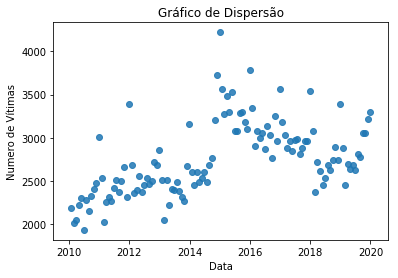

In [29]:
plt.scatter(df_acidentes_resample.index, df_acidentes_resample['NumeroDeVitimas'].values, alpha=0.85)
plt.ylabel('Numero de Vítimas')
plt.xlabel('Data')
plt.title('Gráfico de Dispersão')
plt.show()

<p style='text-align: justify'>O gráfica mostra que há um certo crescimento nos números de vítimas com o passar dos anos, dessa forma pode-se aplicar a regressão linear para tentar prever o número de vítimas envolvidas em acidentes em datas futuras, tomares como exemplo uma data daqui a 10 anos, o mês de dezembro de 2030.</p>

In [30]:
y = np.array(df_acidentes_resample['NumeroDeVitimas'].values, dtype=float)
x = np.array(df_acidentes_resample['NumeroDeVitimas'].index.values, dtype=float)
result = linregress(x,y)
a = result.slope
b = result.intercept

In [31]:
x_lin_r = np.linspace(min(x), max(x), 100)
x_lin_r_dt = pd.to_datetime(x_lin_r)
y_lin_r = (a * x_lin_r) + b

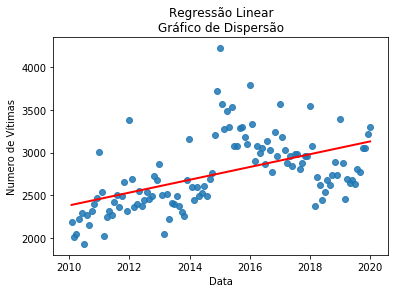

In [32]:
fg, ax = plt.subplots(1, 1)
ax.plot(x_lin_r_dt, y_lin_r, color='r', linewidth=2)
plt.ylabel('Numero de Vítimas')
plt.xlabel('Data')
plt.title('Regressão Linear\nGráfico de Dispersão')
plt.scatter(df_acidentes_resample.index, df_acidentes_resample['NumeroDeVitimas'].values, alpha=0.85)
plt.show()

In [33]:
def vitimasData(data):
    if data[-2:] in ['04', '06', '09', '11']:
        data_final = np.datetime64(data, 'ns') + np.timedelta64('29', 'D')
    elif data[-2:] in ['02']:
        data_final = np.datetime64(data, 'ns') + np.timedelta64('27', 'D')
    elif data[-2:] in ['01', '03', '05', '07', '08', '10', '12']:
        data_final = np.datetime64(data, 'ns') + np.timedelta64('30', 'D')
    else:
        print("Formato de data inválido\n'YYYY-MM'")
        return

    data_array = np.array(data_final, dtype=float)
    vitimas = int((a * data_array) + b)
    return vitimas

In [34]:
vitimasData('2030-12')

3955

<p style='text-align: justify'>Portanto levando-se em conta a regressão linear obtida, têm-se que para o mês de dezembro de 2030 a previsão é que o número de vítimas seja de <i>3955</i>.</p>

### Comportamento dos Dados Referentes as Vítimas para o Período de 2010 - 2019

<p style='text-align: justify'>Utilizando o gráfico de dispersão e aplicando uma mudança na coloração do mesmo, para as variáveis <i>'Levemente_feridos'</i>, <i>'Moderadamente_feridos'</i>, <i>'Gravemente_feridos'</i> e <i>'Mortos'</i>.</p>

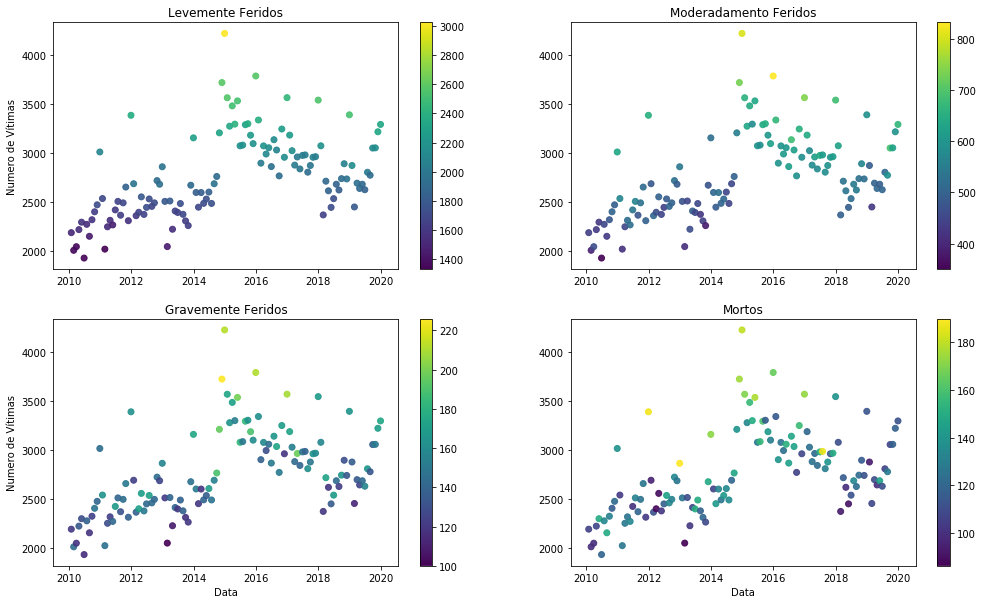

In [35]:
fg, ax = plt.subplots(nrows=2, ncols=2, figsize=(17,10))
vit_array = ['Levemente_feridos', 'Moderadamente_feridos', 'Gravemente_feridos', 'Mortos']
title_array = ['Levemente Feridos', 'Moderadamento Feridos', 'Gravemente Feridos', 'Mortos']
for i in range(len(vit_array)):
    j = i % 2
    w = int((i - j) / 2)
    sc = ax[w][j].scatter(df_acidentes_resample.index, df_acidentes_resample['NumeroDeVitimas'].values, alpha=.9,
                c=df_acidentes_resample[vit_array[i]])
    ax[w][j].set_title(title_array[i])
    ax[1][w].set_xlabel('Data')
    ax[j][0].set_ylabel('Numero de Vítimas')
    fg.colorbar(sc, ax=ax[w][j])

<p style='text-align: justify'>Os gráficos mostram que ocorre um crescimento no número dessas variáveis como o passar do tempo, porém este aumento em princípio pode ser explicado pelo simples fato do aumento do número de acidentes. Um bom exemplo dessa situação pode ser encontrado no período de 2015 - 2016, onde ocorre um aumento significativo nos números de acidentes e exatamente nesse período onde se observar em sua grande maioria altos valores associados a essas variáveis.</p>

## Conclusão

<p style='text-align: justify'>As informações obtidas com a análise do dataset conseguem sintetizar quais as trechos de rodovias possuem uma maior incidência de acidentes, além de fornecer a informação relacionada ao tipo de acidente que mais ocorreu no período o qual o dataset aborda. Além de demonstrarem que com o passar dos anos os números de acidentes vem aumentando.</p>

<p style='text-align: justify'>Em relação ao aumento do número de acidentes uma séria de fatores externos podem influenciar essa variável, desde aumenta da frota de veículos, frota esta que vem aumentando com o passar dos anos também, condições de rodovias, entre outras. Por mais que se perceba o aumento nessa variável, mensurar as reais causas que influenciam esse aumento, utilizando unicamente os dados apresentados no dateset, se torna impraticável. Porém essa informação norteia possíveis estudos e análises para entender o que ocasiona e como interpretar os possíveis impactos desses aumentos.</p>

<p style='text-align: justify'>No que diz respeito as informações sobre rodovias mais perigosas e tipo de acidente mais comum, são de extrema valia, pelo simples fato de poderem ser utilizadas em planejamentos futuros, focando na adoção de medidas que venham a buscar diminuir este tipo de acidente e minimizar as ocorrências nas estradas apontadas.</p>

<p style='text-align: justify'>De longe a principal limitação entrada no dataset está relacionada ao modo de como as informações foram inseridas no mesmo, onde campos que deveriam ser numéricos apresentavam valores no formato de strings, e o campo <i>'TipoDeAcidente'</i>, que apresentava informações duplicadas, ambiguidades e erros gramaticais, tornando extremamente trabalhoso o pré-processamento dessas informações, infelizmente essas informações foram adicionadas ao dataset sem nenhum critério ou padronização, o que de certa forma promove uma barreira para a utilização do mesmo.</p>

<p style='text-align: justify'>A principal melhoria a ser implementada nesses dataset sem sombra de dúvidas seria a padronização das informações inseridas, até mesmo a importação do mesmo no <i>Pandas</i> é confusa, o mesmo se utiliza de <b>encoding</b> bastante peculiar.</p>

<p style='text-align: justify'>Atualmente onde se promove tanto os dados abertos essa falta de padronização e controle de qualidade com as informações inseridas vai na contra mão do que é pregado. Deve-se facilitar não só a obtenção desses dados, mas também a sua interpretação, quanto mais estudos e análises forem feitas sobre o mesmo maior será o conhecimento extraído.</p>